### Problem 1 - Part B 

Use $xe^{-x}$ as pdf $f_X$

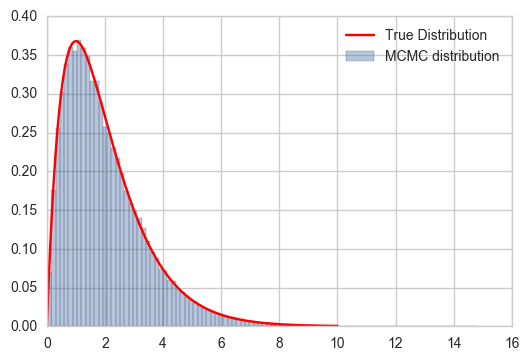

starting point was  0.3107651267906335 accepted 0.3651441252499634


In [48]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import gamma
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

def metropolis(p, qdraw, stepsize, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted = 0
    for i in range(nsamp):
        x_star = qdraw(x_prev, stepsize)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
            accepted += 1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

def prop(x, step):
    return np.random.normal(x, step)

f = lambda x: x*np.exp(-x)
    
x0=np.random.uniform()
nsamps=410060
samps, acc = metropolis(f, prop, 3.5, nsamps, x0)
burnin = int(nsamps*0.2)
burnin

xxx= np.linspace(0,10,1000)
plt.plot(xxx, f(xxx), 'r', label=u'True Distribution') 
plt.hist(samps[burnin:],bins=100, alpha=0.4, label=u'MCMC distribution', normed=True) 
plt.legend()
plt.show()
print("starting point was ", x0, "accepted", acc/nsamps)


In [49]:
def corrplot(trace, maxlags=50):
    plt.acorr(trace-np.mean(trace),  normed=True, maxlags=maxlags);
    plt.xlim([0, maxlags])

thin=10
sampsthin=samps[burnin::thin]


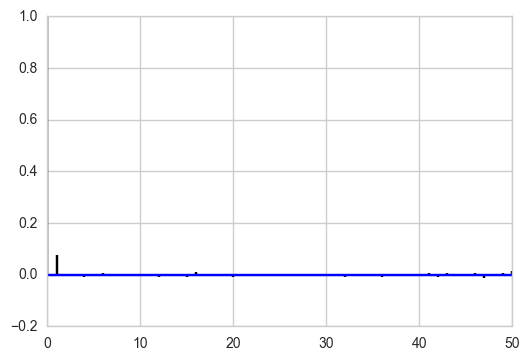

In [50]:
corrplot(sampsthin)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


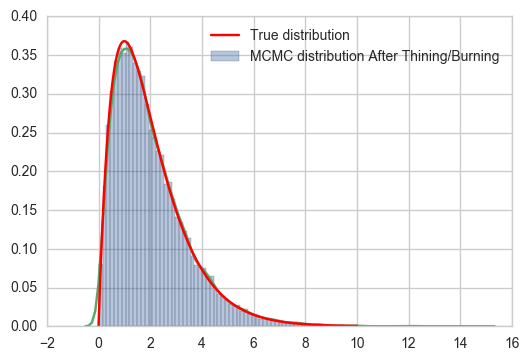

starting point was  0.3107651267906335 accepted 0.3651441252499634
accepted number =  149731 number of samples =  410060


In [51]:
# plot our sample histogram
plt.hist(sampsthin,bins=100, alpha=0.4, label=u'MCMC distribution After Thining/Burning', normed=True) 
sns.kdeplot(sampsthin)
#plot the true function
plt.plot(xxx, f(xxx), 'r', label=u'True distribution') 
plt.legend()

plt.show()
print("starting point was ", x0, "accepted", acc/nsamps)
print("accepted number = ",acc,"number of samples = ",nsamps)

In [56]:
h = lambda x: (x**3)*(np.sin(np.sqrt(np.log(x+1))))//(2+(x-4)**2)

####Run Metropolis for 50 times ####
metropolis_int = []

MC_Int = np.zeros(100)

for k in range(0,100):
    x0=np.random.uniform()
    nsamps=410060
    samps, acc = metropolis(f, prop, 3.5, nsamps, x0)
    burnin = int(nsamps*0.2)
    sampsthin=samps[burnin::thin]
    result = [h(dig) for dig in sampsthin]   
    MC_Int[k] = np.mean(result)

print("Mean basic MC estimate using metropolis sampling: ", np.mean(MC_Int))
print("Standard deviation of our estimates: ", np.std(MC_Int))
print("Variance of our estimates: ", (np.std(MC_Int))**2)



Mean basic MC estimate using metropolis sampling:  5.72996067673
Standard deviation of our estimates:  0.0674044888875
Variance of our estimates:  0.00454336512219


### Problem 1 - Part (A) 